# EXERCICE 3 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE
Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [9]:
# generation de donnee synthetiques...
np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<p=200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (0.01 * np.random.normal(size=n))
# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul

# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


In [5]:
# regression lineaire avec regularisation Lasso ...

#... regression
from sklearn.linear_model import Lasso

alpha = 0.1
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)

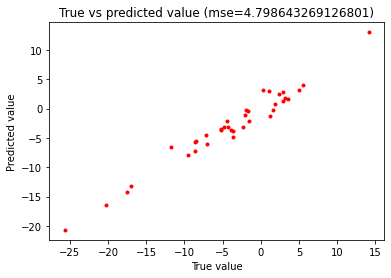

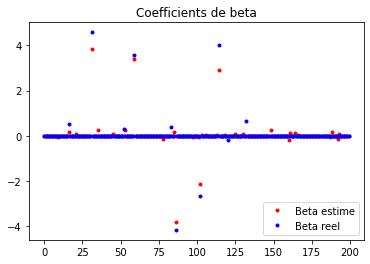

In [6]:
#... representation du resultat

fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()


fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()

## QUESTION 1:
Jouez l'exemple avec n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations


## QUESTION 2:
On garde n=75. Utiliser la validation croisee de type K-folds pour trouver le meilleur coefficient alpha au sens de la MSE.

AIDE : Pour comprendre l'utilisation de K-folds sous sklearn vous pouvez jouer l'exemple ci-dessous


In [8]:
from sklearn.model_selection import KFold

data = np.random.randn(12,3)
kf = KFold(n_splits=3)

for train, test in kf.split(data):
  print("+++++++++++++++++++++++++++++++++++++++")
  print('train='+str(train)+':')
  print(str(data[train,:]))
  print('test='+str(test)+':')
  print(str(data[test,:]))
  print("+++++++++++++++++++++++++++++++++++++++")



+++++++++++++++++++++++++++++++++++++++
train=[ 4  5  6  7  8  9 10 11]:
[[-0.39490939  0.29496104 -1.68805595]
 [ 0.03817559  0.05400501  0.46264239]
 [ 1.22636403 -2.28065812 -0.19489527]
 [ 1.18965017  1.7662672  -0.13884516]
 [-1.03841641  1.72908337  0.03601734]
 [ 0.13315529 -1.74767985  0.79087136]
 [-0.9733243  -0.42078917 -1.14566203]
 [-0.19275124  2.65937212  0.1124496 ]]
test=[0 1 2 3]:
[[ 0.60551364 -0.43629276  1.48809915]
 [ 0.06971618  0.45490058 -0.20291328]
 [-0.34152365 -0.68470559  0.35853867]
 [-0.69704054 -0.50396402 -0.21330757]]
+++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++
train=[ 0  1  2  3  8  9 10 11]:
[[ 0.60551364 -0.43629276  1.48809915]
 [ 0.06971618  0.45490058 -0.20291328]
 [-0.34152365 -0.68470559  0.35853867]
 [-0.69704054 -0.50396402 -0.21330757]
 [-1.03841641  1.72908337  0.03601734]
 [ 0.13315529 -1.74767985  0.79087136]
 [-0.9733243  -0.42078917 -1.14566203]
 [-0.19275124  2.65937212  0.1124496 ]]
test=[4 5 6 7]:


## QUESTION 3 (optionelle - sans correction plus tard):
Comparez les resultats obtenus LASSO avec ceux d'une méthode de selection de variables 'forward' avec un critère BIC


In [ ]:
# TODO